In [146]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [147]:
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Data Preparation Process

Check for missing values

In [149]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Drop the columns with null values

In [150]:
df = df.dropna(axis = 0)

Spliting of Categorical and Numeric datas

In [151]:
categorical_features=['sex','education','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
numeric_features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

# EDA

Checking the unique values and no of values present in each 

In [152]:
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())

sex :
F    1620
M    1307
Name: sex, dtype: int64
education :
1.0    1240
2.0     874
3.0     487
4.0     326
Name: education, dtype: int64
is_smoking :
NO     1480
YES    1447
Name: is_smoking, dtype: int64
BPMeds :
0.0    2839
1.0      88
Name: BPMeds, dtype: int64
prevalentStroke :
0    2909
1      18
Name: prevalentStroke, dtype: int64
prevalentHyp :
0    2007
1     920
Name: prevalentHyp, dtype: int64
diabetes :
0    2848
1      79
Name: diabetes, dtype: int64


C:\Users\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histo

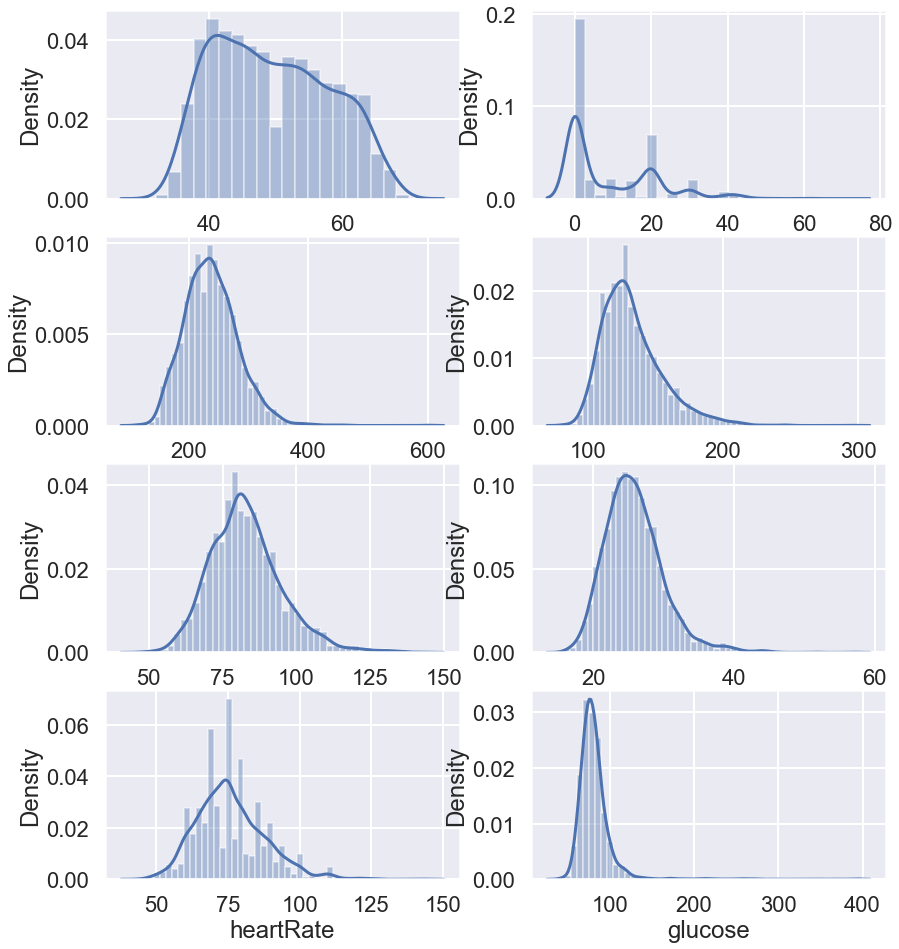

In [153]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in numeric_features:
    sns.distplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

TotChol,sysBP,diaBP,BMI,glucose have Even Distribution

Heartrate display uneven distribution

and cigarPerDay is more uneven

C:\Users\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


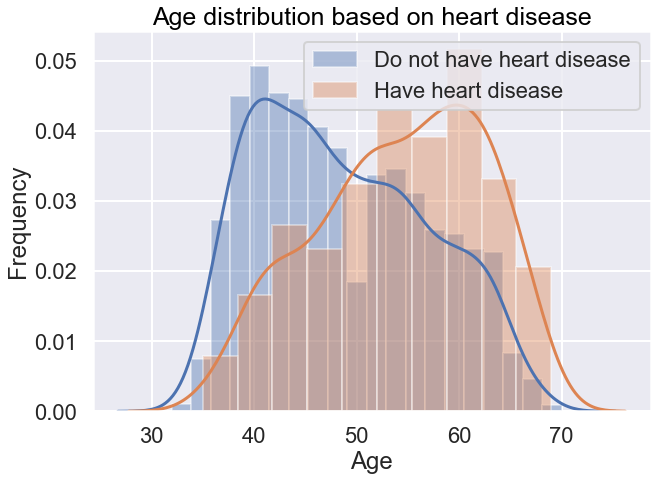

In [275]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)
sns.distplot(df[df['TenYearCHD'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['TenYearCHD'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


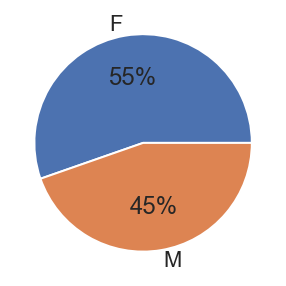

In [154]:
gender = ['F','M']
gender_data = pd.Series(df['sex']).value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_data,labels=gender,autopct='%.0f%%')
plt.show()

Encoding Technique

In [155]:
le = LabelEncoder()
df['is_smoking'] = le.fit_transform(df['is_smoking'])
df['sex'] = le.fit_transform(df['sex'])

In [156]:
df=df.drop(["id"],axis=1)

Feature selection

In [157]:
from sklearn.feature_selection import chi2
x=df[['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']]
y = df['TenYearCHD']
x

,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes
1,1,0,0.0,0,1,0
2,0,1,0.0,0,0,0
3,1,1,0.0,0,1,0
4,0,1,0.0,0,0,0
5,0,0,0.0,0,1,0
...,...,...,...,...,...,...
3384,0,0,0.0,0,1,0
3385,0,0,0.0,0,0,0
3386,0,0,0.0,0,0,0
3387,1,1,0.0,0,1,0


In [158]:
chi_scores = chi2(x, y)

Higher the Chi square value higher the relation between the target 

<AxesSubplot:>

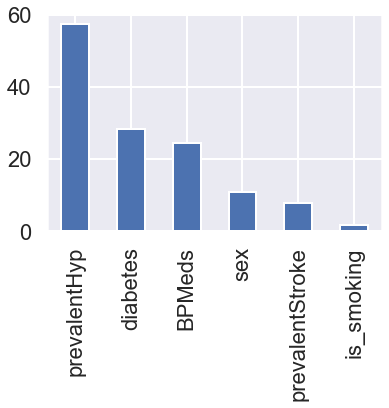

In [159]:
chi_values = pd.Series(chi_scores[0], index=x.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [160]:
df = df.drop(columns = 'is_smoking')

In [145]:
import statsmodels.api as sm
x = df.iloc[:, 0:14]
y = df.iloc[:, 14]

In [162]:
res =sm.Logit(y,x).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.543689
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2927
Model:                          Logit   Df Residuals:                     2921
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                 -0.2774
Time:                        11:50:31   Log-Likelihood:                -1591.4
converged:                       True   LL-Null:                       -1245.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sex                -0.7270      0.084     -8.628      0.000      -0.892      -0.562
is_smoking         -1.1633      0.081    -14.428      0.000      -1.321      -1.005
BPMeds              0.4568      0.253      1.804      0.071      -0.040       0.953
prevalentStroke     0.2084      0.510      0.409      0.683      -0.791       1.208
prevalentHyp       -0.5754      0.090     -6.365      0.000      -0.753      -0.398
diabetes            0.3893      0.249      1.561      0.119      -0.100       0.878
===================================================================================
"""

This provides insights into the statistical significance and coefficients of the predictors in relation to the target variable.

# Models and Predictions

Check for Data Distribution based on target Values

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

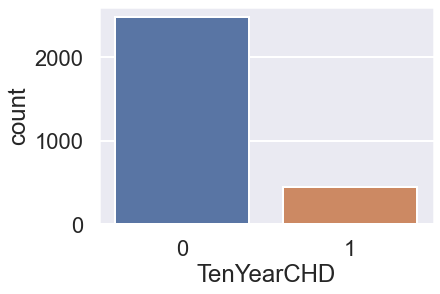

In [163]:
sns.countplot(x = 'TenYearCHD',data= df)

In [164]:
df["TenYearCHD"].value_counts(normalize=True)

0    0.848309
1    0.151691
Name: TenYearCHD, dtype: float64

In [165]:
x = df.iloc[:,0:14]
y = df.iloc[:,14]

In [166]:
num_before = dict(Counter(y))
# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)
X_smote,y_smote=pipeline.fit_resample(x,y)
num_after=dict(Counter(y_smote))
print(num_before,num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


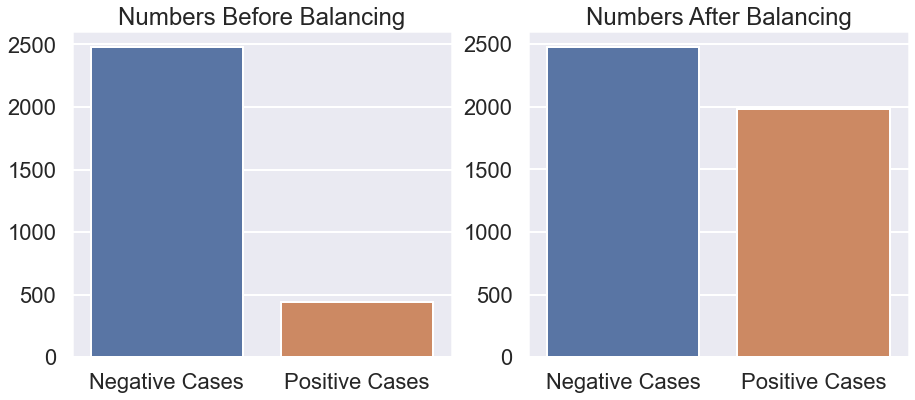

In [167]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

The new ratio between negative and positive cases now stands at approximately 1:1.2, which is a significant improvement compared to the original imbalance of 1:5.57. This balancing of the dataset enhances our ability to develop and evaluate predictive models, ensuring that both positive and negative cases are adequately represented in the data.

In [184]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age','education' ,'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1486,43,2.0,0,20.0,0.0,0,0,0,208.0,119.0,69.0,19.48,67.0,73.0,0
407,51,1.0,0,0.0,0.0,0,1,0,292.0,166.0,89.0,27.51,68.0,88.0,0
2711,44,4.0,0,5.0,0.0,0,0,0,231.0,133.0,89.0,29.29,70.0,83.0,0
1122,54,1.0,0,0.0,0.0,0,1,1,326.0,187.0,95.0,29.94,67.0,235.0,0
1604,47,1.0,0,9.0,0.0,0,1,1,214.0,144.0,92.0,22.73,72.0,57.0,0


In [185]:
x = new_data.iloc[:, 0:14]
y= new_data.iloc[:,-1]

In [186]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling

In [187]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

# Models

KNN Model

In [252]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test,knn_pred)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 76.29%


<AxesSubplot:>

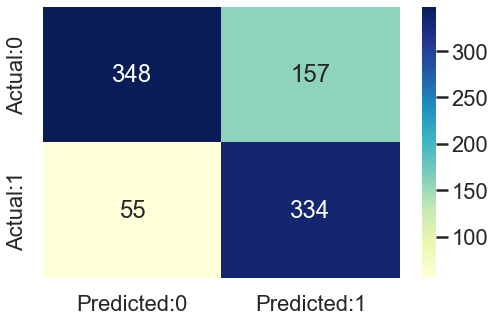

In [253]:
cm=confusion_matrix(y_test,knn_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [254]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       505
           1       0.68      0.86      0.76       389

    accuracy                           0.76       894
   macro avg       0.77      0.77      0.76       894
weighted avg       0.78      0.76      0.76       894



In [255]:
params = {'n_neighbors': np.arange(1,5)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid = params,scoring = 'accuracy',cv = 5)
grid.fit(X_train,y_train)
pred = grid.predict(X_test)
knn_accuracy = accuracy_score(y_test,pred)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 80.98%


Decision Tree

In [233]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)
dtree.fit(X_train,y_train)
tree_predict = dtree.predict(X_test)
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 78.97%


<AxesSubplot:>

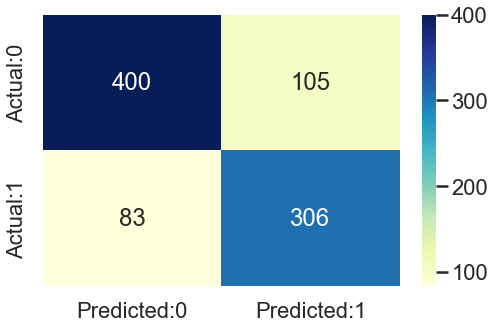

In [234]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [235]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       505
           1       0.74      0.79      0.77       389

    accuracy                           0.79       894
   macro avg       0.79      0.79      0.79       894
weighted avg       0.79      0.79      0.79       894



SVC

In [258]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', probability=True)
model.fit(X_train,y_train)
svm_predict = model.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 69.57%


<AxesSubplot:>

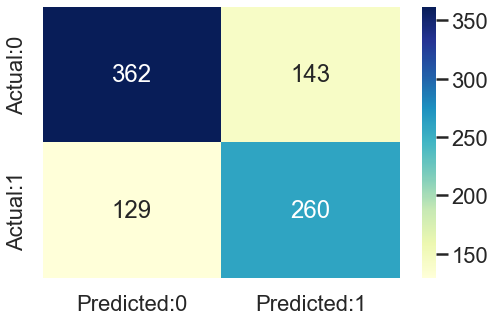

In [259]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [260]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       505
           1       0.65      0.67      0.66       389

    accuracy                           0.70       894
   macro avg       0.69      0.69      0.69       894
weighted avg       0.70      0.70      0.70       894



In [266]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas,}
grid_svc = GridSearchCV(SVC(), param_grid=param_grid,cv = 10)
grid_svc.fit(X_train,y_train)
pred = grid_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test,pred)
print(accuracy_svc)

0.8590604026845637


Random Forest

In [239]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,pred)
print(f"Using random forest we get an accuracy of {round(rf_accuracy*100,2)}%")

Using random forest we get an accuracy of 90.16%


<AxesSubplot:>

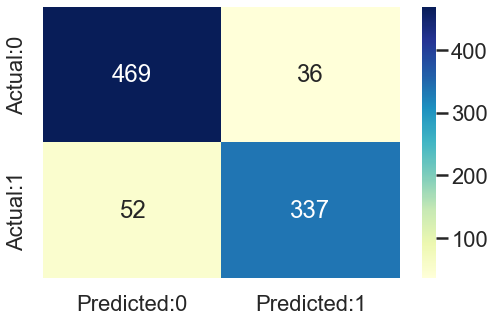

In [240]:
cm=confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [270]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       505
           1       0.86      0.81      0.83       389

    accuracy                           0.86       894
   macro avg       0.86      0.85      0.86       894
weighted avg       0.86      0.86      0.86       894



In [273]:
comparison = pd.DataFrame({
    "K-nearest neighbours":{'Accuracy':round(knn_accuracy * 100,2),  },
    "Decision trees":{'Accuracy':round(tree_accuracy * 100 ,2),  },
    "Support vector machine":{'Accuracy':round(accuracy_svc * 100,2), },
    "Random Forest Classifier":{'Accuracy': round(rf_accuracy * 100 ,2),  },
}).T

In [274]:
comparison

,Accuracy
K-nearest neighbours,80.98
Decision trees,78.97
Support vector machine,85.91
Random Forest Classifier,90.16
